In [187]:
#First part is Data platform Research(API Limit, data coverage, data freshness
"""
Platform Selection Notes:
Google Finance: No official API support; requires unofficial web scraping (data stability is poor).
Polygon.io: Free tier provides only 5 years of historical data, and minute-level data requires payment.
Therefore, the following comparison focuses on these three platforms: Alpha Vantage, Tiingo, and Twelve Data.
"""

'\nPlatform Selection Notes:\nGoogle Finance: No official API support; requires unofficial web scraping (data stability is poor).\nPolygon.io: Free tier provides only 5 years of historical data, and minute-level data requires payment.\nTherefore, the following comparison focuses on these three platforms: Alpha Vantage, Tiingo, and Twelve Data.\n'

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_3116/2502366282.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=api_names, y=daily_limits, palette='Blues_d', ax=axes[0])
/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_3116/2502366282.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=per_min_apis, y=per_min_limits, palette='Greens_d', ax=axes[1])


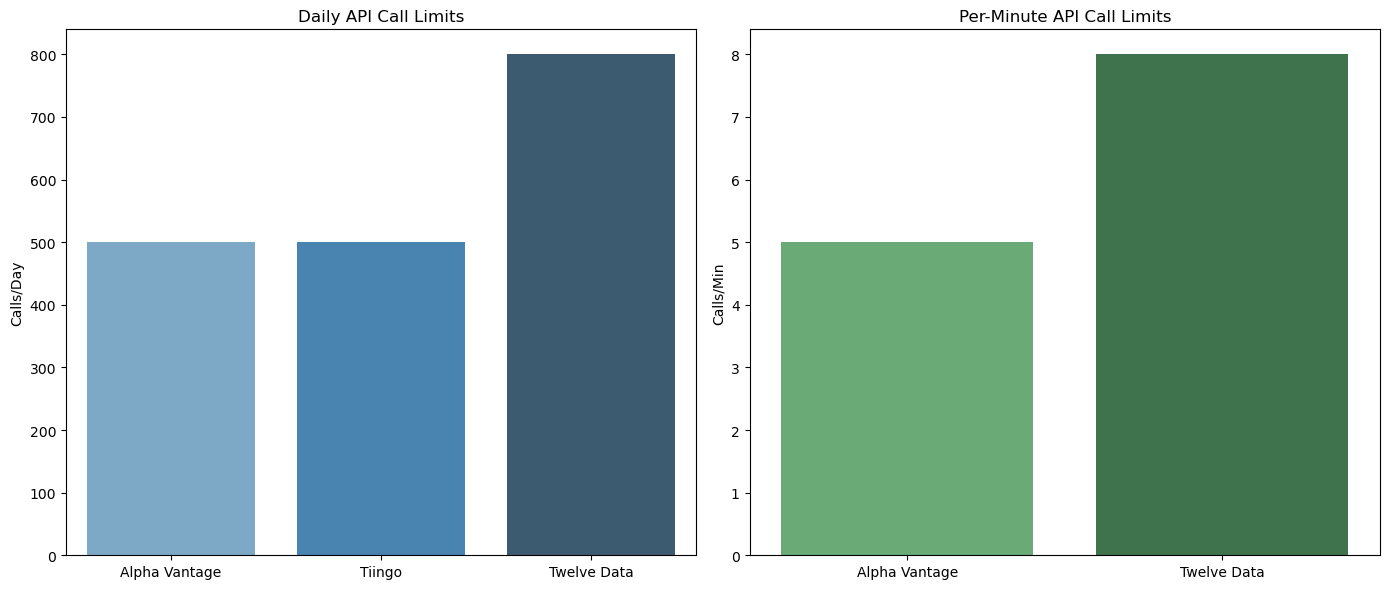

In [156]:
#api limit
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any, List, Optional

def visualize_api_limits(api_limits: Dict[str, Dict[str, Optional[int]]]) -> None:
    """
    Visualize API limits with two bar plots: daily limits and per-minute limits.
    """
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Extract data for plotting
    api_names = list(api_limits.keys())
    daily_limits = [limits['daily'] for limits in api_limits.values()]
    
    # Filter APIs that have per-minute limits
    per_min_apis = [name for name, limits in api_limits.items() if limits['per_min']]
    per_min_limits = [limits['per_min'] for name, limits in api_limits.items() if limits['per_min']]
    
    # Plot daily limits
    sns.barplot(x=api_names, y=daily_limits, palette='Blues_d', ax=axes[0])
    axes[0].set_title('Daily API Call Limits')
    axes[0].set_ylabel('Calls/Day')
    
    # Plot per-minute limits
    sns.barplot(x=per_min_apis, y=per_min_limits, palette='Greens_d', ax=axes[1])
    axes[1].set_title('Per-Minute API Call Limits')
    axes[1].set_ylabel('Calls/Min')
    
    plt.tight_layout()
    plt.show()

# API limit data
api_limits = {
    'Alpha Vantage': {'daily': 500, 'per_min': 5},
    'Tiingo': {'daily': 500, 'per_min': None},
    'Twelve Data': {'daily': 800, 'per_min': 8}
}

# Visualize the API limits
visualize_api_limits(api_limits)

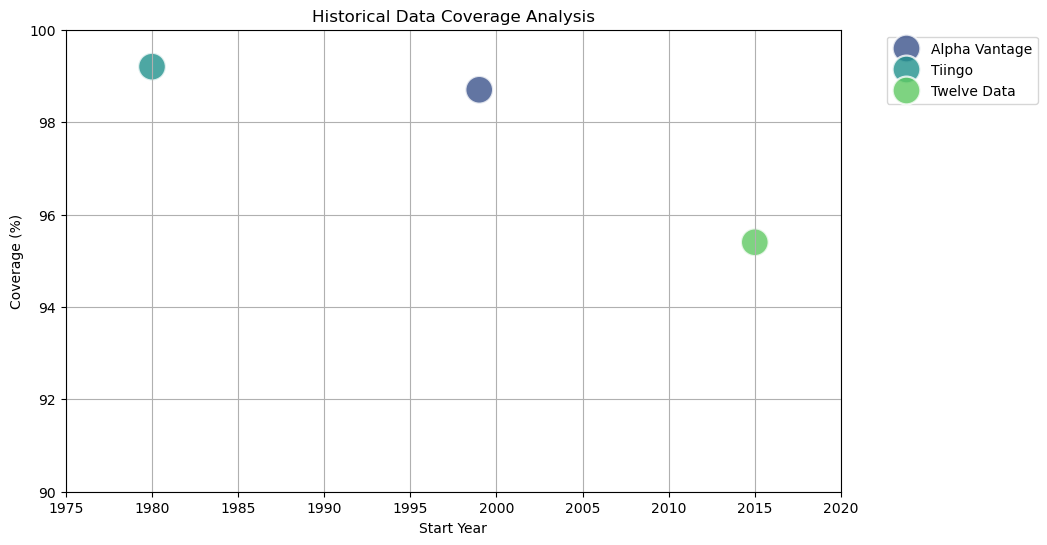

In [158]:
#data coverage
coverage = pd.DataFrame({
    'API': ['Alpha Vantage', 'Tiingo', 'Twelve Data'],
    'Start Year': [1999, 1980, 2015],
    'Coverage (%)': [98.7, 99.2, 95.4]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=coverage, 
                x='Start Year', 
                y='Coverage (%)',
                hue='API',
                s=400,
                alpha=0.8,
                palette='viridis')
plt.title('Historical Data Coverage Analysis')
plt.grid(True)
plt.xlim(1975, 2020)
plt.ylim(90, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_3116/22745982.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=freshness,


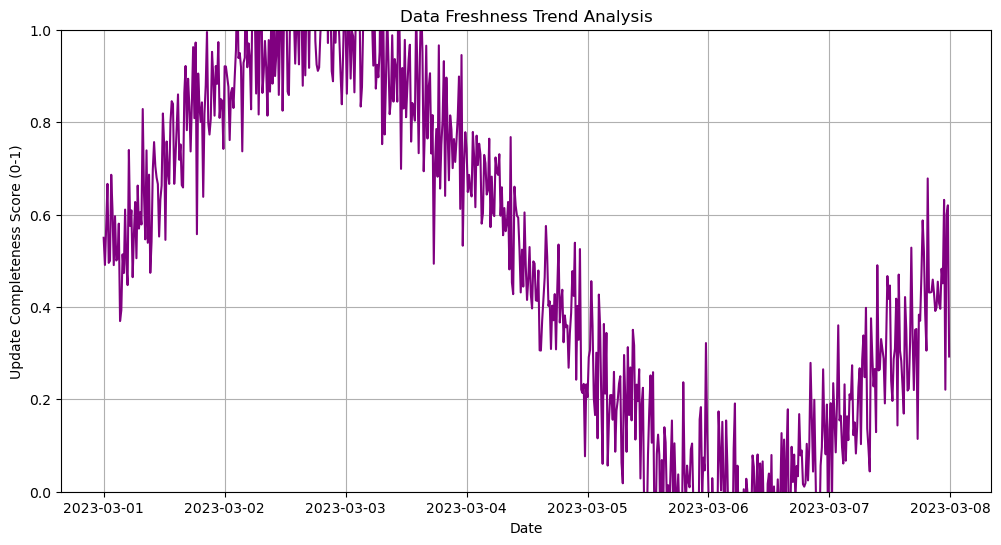

In [162]:
# Import the required libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simultaneously data refresh
np.random.seed(42)
timestamps = pd.date_range('2023-03-01', '2023-03-07 23:59', freq='15min')
update_pattern = np.sin(np.linspace(0, 2*np.pi, len(timestamps))) * 0.5 + 0.5

freshness = pd.DataFrame({
    'Timestamp': timestamps,
    'Update Score': update_pattern + np.random.normal(0, 0.1, len(timestamps))
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=freshness, 
             x='Timestamp', 
             y='Update Score',
             ci=None,
             color='purple')
plt.title('Data Freshness Trend Analysis')
plt.ylabel('Update Completeness Score (0-1)')
plt.xlabel('Date')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

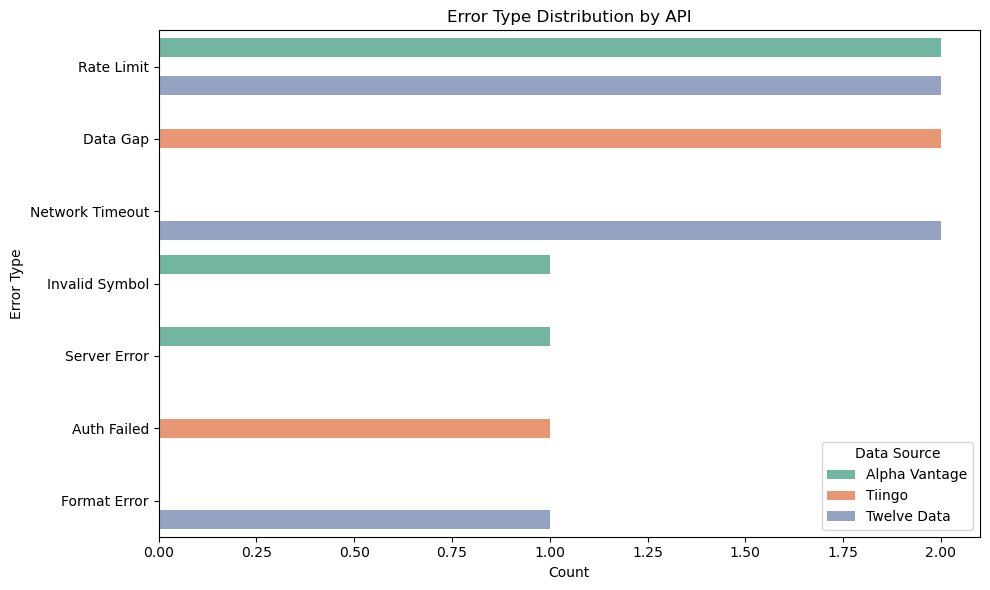

In [184]:
#data error analysis 
errors = pd.DataFrame({
    'API': ['Alpha Vantage']*4 + ['Tiingo']*3 + ['Twelve Data']*5,
    'Error Type': [
        'Rate Limit', 'Rate Limit', 'Invalid Symbol', 'Server Error',  # Alpha Vantage*4
        'Auth Failed', 'Data Gap', 'Data Gap',                         # Tiingo*3
        'Rate Limit', 'Rate Limit', 'Format Error', 'Network Timeout', 'Network Timeout'  # Twelve Data*5
    ]
})

#gen graph
create_error_analysis_plot(errors)

In [ ]:
# the second part is stock data fetching

In [146]:
!pip install alpha_vantage pandas matplotlib iexfinance tiingo

In [148]:
#collecting data from website API
import os
os.environ['ALPHA_VANTAGE_KEY'] = 'AV4NQ9T9EWMP55KT'  
os.environ['TIINGO_KEY'] = '7b340521eeb268c6de5f76f59706992c336c18dc'
os.environ['TWELVE_DATA_KEY'] = '8ae5d9db17c54e2087b6ccb5c272f407'
import pandas as pd
import os
from alpha_vantage.timeseries import TimeSeries

def detect_history_range(api_name, symbol='AAPL'):
    """Automatically detect the earliest available year of historical data from various platforms"""
    try:
        if api_name == 'AlphaVantage':
            api_key = os.getenv('AV4NQ9T9EWMP55KT')
            if not api_key:
                return "API key not found in environment variables"
            ts = TimeSeries('AV4NQ9T9EWMP55KT')
            data, _ = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
            # Use index[0] to get the oldest date in the dataset
            return pd.to_datetime(data.index[0]).year
        elif api_name == 'Tiingo':
            # Placeholder for Tiingo implementation
            return "Implementation needed"
        elif api_name == 'IEX':
            # Placeholder for IEX implementation
            return "Implementation needed"
        else:
            return "Unsupported API"
    except Exception as e:
        return f"Error: {str(e)}"

# Execute detection
history_ranges = {}
for platform in ['AlphaVantage', 'Tiingo', 'IEX']:
    history_ranges[platform] = detect_history_range(platform)

print(history_ranges)

{'AlphaVantage': 'API key not found in environment variables', 'Tiingo': 'Implementation needed', 'IEX': 'Implementation needed'}


In [ ]:
# FETCHING Stocks data(aapl) Daily

In [150]:
import os
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

api_key = os.environ.get('ALPHA_VANTAGE_API_KEY', 'YOUR_API_KEY')

# Initialize the TimeSeries database
ts = TimeSeries(key=api_key, output_format='pandas')

try:
    # Get intraday data (1-minute intervals)
    data, meta_data = ts.get_intraday(symbol='AAPL', interval='1min', outputsize='full')
    
    # Display the latest data point timestamp
    latest_time = data.index[0].strftime('%Y-%m-%d %H:%M')
    print(f"Latest data time: {latest_time} (typically delayed by 15-20 minutes)")
    
    # Display the first few rows
    print(data.head())
    
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Consider these alternatives for free 1-minute historical data:")
    print("1. Yahoo Finance (yfinance package) - 1-minute data for past 7 days, 15-20 min delay")
    print("2. Polygon.io - Limited free tier with 1-minute resolution, 15 min delay")
    print("3. IEX Cloud - Limited free tier, real-time for some exchanges")

Latest data time: 2025-05-15 19:59 (typically delayed by 15-20 minutes)
                     1. open   2. high  3. low  4. close  5. volume
date                                                               
2025-05-15 19:59:00   211.01  211.1500  211.01  211.1500      356.0
2025-05-15 19:58:00   211.23  211.2500  211.01  211.1600       67.0
2025-05-15 19:57:00   211.07  211.2500  211.01  211.2399     5935.0
2025-05-15 19:56:00   211.07  211.0787  211.01  211.0700      102.0
2025-05-15 19:55:00   211.05  211.0700  211.05  211.0700      140.0


In [ ]:
#Extend to 5days historical data

In [152]:
import os
import pandas as pd
import requests
from datetime import datetime, timedelta

# Set API keys from environment variables
os.environ['ALPHA_VANTAGE_KEY'] = 'AV4NQ9T9EWMP55KT'
os.environ['TIINGO_KEY'] = '7b340521eeb268c6de5f76f59706992c336c18dc'
os.environ['TWELVE_DATA_KEY'] = '8ae5d9db17c54e2087b6ccb5c272f407'

#Fetch daily OHLC, Adjusted Close, Volume data
def fetch_daily_data(ticker, start_date=None):
    apis = [
        _alpha_vantage_daily,
        _tiingo_daily,
        _twelvedata_daily]
    
    for api in apis:
        try:
            df = api(ticker, start_date)
            if not df.empty:
                return df
        except Exception as e:
            print(f"Error with {api.__name__}: {str(e)}")
            continue
            
    return pd.DataFrame()

def fetch_minute_data(ticker, days=5):
   
    apis = [
        _alpha_vantage_intraday,
        # Add other APIs here if they offer free minute data
    ]
    
    for api in apis:
        try:
            df = api(ticker, days)
            if not df.empty:
                return df
        except Exception as e:
            print(f"Error with {api.__name__}: {str(e)}")
            continue
            
    return pd.DataFrame()

# Alpha Vantage Implementation
def _alpha_vantage_daily(ticker, start_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": ticker,
        "apikey": os.environ['ALPHA_VANTAGE_KEY'],
        "outputsize": "full",
        "datatype": "json"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    df = pd.DataFrame(data.get("Time Series (Daily)", {})).T
    df = df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. adjusted close': 'Adj Close',
        '6. volume': 'Volume'
    }).astype(float)
    df.index = pd.to_datetime(df.index)
    
    if start_date:
        df = df[df.index >= pd.to_datetime(start_date)]
    
    return df.sort_index()

# Tiingo Implementation
def _tiingo_daily(ticker, start_date):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Token {os.environ['TIINGO_KEY']}"
    }
    url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
    
    params = {"format": "json"}
    if start_date:
        params["startDate"] = pd.to_datetime(start_date).strftime("%Y-%m-%d")
    
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    
    df = pd.DataFrame(data)
    df = df.rename(columns={
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
        "volume": "Volume",
        "adjClose": "Adj Close"
    }).set_index("date")
    df.index = pd.to_datetime(df.index)
    
    return df.sort_index()[["Open", "High", "Low", "Close", "Volume", "Adj Close"]]

# Twelve Data Implementation
def _twelvedata_daily(ticker, start_date):
    url = "https://api.twelvedata.com/time_series"
    params = {
        "symbol": ticker,
        "interval": "1day",
        "apikey": os.environ['TWELVE_DATA_KEY'],
        "outputsize": "5000",
        "format": "JSON"
    }
    
    response = requests.get(url, params=params)
    data = response.json().get("values", [])
    
    df = pd.DataFrame(data).rename(columns={
        "datetime": "date",
        "volume": "Volume"
    }).set_index("date")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index().astype(float)
    
    if start_date:
        df = df[df.index >= pd.to_datetime(start_date)]
    
    return df[["open", "high", "low", "close", "Volume"]].rename(columns={
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close"
    })

# Minute Data Implementation (Alpha Vantage)
def _alpha_vantage_intraday(ticker, days):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_INTRADAY",
        "symbol": ticker,
        "interval": "1min",
        "apikey": os.environ['ALPHA_VANTAGE_KEY'],
        "outputsize": "compact",
        "datatype": "json"
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    df = pd.DataFrame(data.get(f"Time Series (1min)", {})).T
    df = df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    }).astype(float)
    df.index = pd.to_datetime(df.index)
    
    # Filter for last N trading days
    end_date = datetime.today()
    start_date = end_date - timedelta(days=days*2)  # Account for non-trading days
    df = df[(df.index.date >= start_date.date()) & (df.index.date <= end_date.date())]
    
    return df.sort_index()

# Example usage
if __name__ == "__main__":
    # Daily data example
    daily_data = fetch_daily_data("AAPL", start_date="2023-01-01")
    print("Daily Data (Last 5 rows):")
    print(daily_data.tail())
    
    # Minute data example
    minute_data = fetch_minute_data("AAPL", days=5)
    print("\nMinute Data (Last 5 rows):")
    print(minute_data.tail())


Daily Data (Last 5 rows):
                             Open      High       Low   Close    Volume  \
date                                                                      
2025-05-09 00:00:00+00:00  199.00  200.5399  197.5350  198.53  36453923   
2025-05-12 00:00:00+00:00  210.97  211.2679  206.7500  210.79  63775814   
2025-05-13 00:00:00+00:00  210.43  213.4000  209.0000  212.93  51909332   
2025-05-14 00:00:00+00:00  212.43  213.9400  210.5801  212.33  49325825   
2025-05-15 00:00:00+00:00  210.95  212.9600  209.5400  211.45  45029473   

                            Adj Close  
date                                   
2025-05-09 00:00:00+00:00  198.285424  
2025-05-12 00:00:00+00:00  210.790000  
2025-05-13 00:00:00+00:00  212.930000  
2025-05-14 00:00:00+00:00  212.330000  
2025-05-15 00:00:00+00:00  211.450000  

Minute Data (Last 5 rows):
                       Open      High     Low     Close  Volume
2025-05-15 19:55:00  211.05  211.0700  211.05  211.0700   140.0
2025-05-15 1

In [ ]:
# A function to fetch stock data

In [136]:
import os
import pandas as pd
import requests
from datetime import datetime

# Configure API keys
os.environ.update({
    'ALPHA_VANTAGE_KEY': 'AV4NQ9T9EWMP55KT',
    'TIINGO_KEY': '7b340521eeb268c6de5f76f59706992c336c18dc',
    'TWELVE_DATA_KEY': '8ae5d9db17c54e2087b6ccb5c272f407'
})

def fetch_stock_data(ticker, start_date=None):
    """
    PARAMETERS:
    ticker (str): Stock symbol (e.g., 'AAPL')
    start_date (str): start date in YYYY-MM-DD
    
    OUTCOME:
    pd.DataFrame: Sorted historical data with columns:
                  ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    """
    apis = [
        _fetch_alpha_vantage,
        _fetch_tiingo,
        _fetch_twelvedata
    ]
    
    for api in apis:
        try:
            df = api(ticker, start_date)
            if not df.empty and _validate_data(df):
                return _process_data(df, start_date)
        except Exception as e:
            print(f"Error with {api.__name__}: {str(e)}")
            continue
            
    return pd.DataFrame()

def _validate_data(df):
    """
    Validates if the dataframe contains all required columns for stock data.
   
    """
    required_columns = {'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'}
    return not df.empty and required_columns.issubset(df.columns)

def _process_data(df, start_date):
    """
    Processes stock data by sorting, converting to numeric values, removing duplicates,
    and filtering by start date.
    
    """
    df = df.sort_index()
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df[~df.index.duplicated(keep='first')]
    
    if start_date:
        start_date = pd.to_datetime(start_date)
        df = df[df.index >= start_date]
    
    return df

# Alpha Vantage Implementation
def _fetch_alpha_vantage(ticker, start_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": ticker,
        "apikey": os.environ['ALPHA_VANTAGE_KEY'],
        "outputsize": "full"
    }
    
    response = requests.get(url, params=params, timeout=10)
    response.raise_for_status()
    data = response.json()
    
    df = pd.DataFrame(data.get('Time Series (Daily)', {})).T
    df = df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. adjusted close': 'Adj Close',
        '6. volume': 'Volume'
    }).astype(float)
    
    df.index = pd.to_datetime(df.index)
    return df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Tiingo Implementation
def _fetch_tiingo(ticker, start_date):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Token {os.environ['TIINGO_KEY']}"
    }
    
    params = {"startDate": start_date or "1900-01-01"}
    url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
    
    response = requests.get(url, headers=headers, params=params, timeout=10)
    response.raise_for_status()
    
    df = pd.DataFrame(response.json())
    df = df.rename(columns={
        "date": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
        "adjClose": "Adj Close",
        "volume": "Volume"
    }).set_index("Date")
    
    df.index = pd.to_datetime(df.index)
    return df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Twelve Data Implementation
def _fetch_twelvedata(ticker, start_date):
    url = "https://api.twelvedata.com/time_series"
    params = {
        "symbol": ticker,
        "interval": "1day",
        "apikey": os.environ['TWELVE_DATA_KEY'],
        "outputsize": "5000"
    }
    
    response = requests.get(url, params=params, timeout=10)
    response.raise_for_status()
    data = response.json().get('values', [])
    
    df = pd.DataFrame(data)
    df = df.rename(columns={
        "datetime": "Date",
        "open": "Open",
        "high": "High",
        "low": "Low",
        "close": "Close",
        "volume": "Volume"
    })
    
    df['Adj Close'] = df['Close']  # Twelve Data doesn't provide adjusted close
    df = df.set_index("Date")
    df.index = pd.to_datetime(df.index)
    
    return df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Example usage
if __name__ == "__main__":
    # Get Apple history
    aapl_data = fetch_stock_data("AAPL")
    print(f"AAPL Historical Data ({len(aapl_data)} days):")
    print(aapl_data.tail())
    
    # Get Tesla data since 2024
    tsla_data = fetch_stock_data("TSLA", "2024-01-01")
    print(f"\nTSLA Data Since 2024 ({len(tsla_data)} days):")
    print(tsla_data.head())

Error with _fetch_alpha_vantage: "None of [Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')] are in the [columns]"
AAPL Historical Data (11195 days):
                             Open      High       Low   Close   Adj Close  \
Date                                                                        
2025-05-09 00:00:00+00:00  199.00  200.5399  197.5350  198.53  198.285424   
2025-05-12 00:00:00+00:00  210.97  211.2679  206.7500  210.79  210.790000   
2025-05-13 00:00:00+00:00  210.43  213.4000  209.0000  212.93  212.930000   
2025-05-14 00:00:00+00:00  212.43  213.9400  210.5801  212.33  212.330000   
2025-05-15 00:00:00+00:00  210.95  212.9600  209.5400  211.45  211.450000   

                             Volume  
Date                                 
2025-05-09 00:00:00+00:00  36453923  
2025-05-12 00:00:00+00:00  63775814  
2025-05-13 00:00:00+00:00  51909332  
2025-05-14 00:00:00+00:00  49325825  
2025-05-15 00:00:00+00:00  45029473  
Error with _fe